In [1]:
import pandas as pd
#Importing the dataset
data=pd.read_csv("IEA GEVO 2023 data.csv")
#Head of the dataset
print("The head of the dataset is:\n",data.head(5),'\n')
#Instances
print("There are ",len(data.axes[0])," instances")

The head of the dataset is:
       region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
1  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
2  Australia  Historical  EV sales share  Cars         EV  2011   percent   
3  Australia  Historical  EV stock share  Cars         EV  2011   percent   
4  Australia  Historical  EV stock share  Cars         EV  2012   percent   

      value  
0  49.00000  
1  49.00000  
2   0.00650  
3   0.00046  
4   0.00280   

There are  10079  instances


In [2]:
year_to_delete=[2010,2011,2012,2025,2030]
df=data.loc[~data['year'].isin(year_to_delete)]

#Deleting regions which are not applicable for analysis
region_to_delete=['EU27','Other Europe','Rest of the world','World']
df=df.loc[~df['region'].isin(region_to_delete)]

#Deleting parameters which are not applicable for analysis
parameter_to_delete=['EV sales share', 'EV stock share','EV stock','Oil displacement, million lge','Oil displacement Mbd','EV charging points','Electricity demand']
df=df.loc[~df['parameter'].isin(parameter_to_delete)]

#Deleting categorys which are not applicable for analysis
category_to_delete=['Projection-STEPS','Projection-APS']
df=df.loc[~df['category'].isin(category_to_delete)]
print(df)

         region    category parameter  mode powertrain  year      unit  \
10    Australia  Historical  EV sales  Cars        BEV  2013  Vehicles   
11    Australia  Historical  EV sales  Cars       PHEV  2013  Vehicles   
20    Australia  Historical  EV sales  Cars       PHEV  2014  Vehicles   
21    Australia  Historical  EV sales  Cars        BEV  2014  Vehicles   
22    Australia  Historical  EV sales  Cars        BEV  2015  Vehicles   
...         ...         ...       ...   ...        ...   ...       ...   
8902        USA  Historical  EV sales  Cars        BEV  2020  Vehicles   
8951        USA  Historical  EV sales  Cars        BEV  2021  Vehicles   
8956        USA  Historical  EV sales  Cars       PHEV  2021  Vehicles   
8959        USA  Historical  EV sales  Cars       PHEV  2022  Vehicles   
8964        USA  Historical  EV sales  Cars        BEV  2022  Vehicles   

         value  
10       190.0  
11       100.0  
20       950.0  
21       370.0  
22       760.0  
...      

In [3]:
df = df.groupby('year')['value'].sum().reset_index()
df

,year,value
0,2013,2.881130e+05
1,2014,4.576780e+05
2,2015,9.099040e+05
3,2016,1.121243e+06
4,2017,1.731703e+06
5,2018,2.651572e+06
6,2019,2.864301e+06
7,2020,4.529404e+06
8,2021,9.025455e+06
9,2022,1.309026e+07


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [5]:
# Define the number of time steps (look-back)
look_back = 1  # Adjust as needed

# Create sequences of data
X, y = [], []
for i in range(len(df) - look_back):
    X.append(df['year'].values[i:i+look_back])
    y.append(df['value'].values[i+look_back])

X, y = np.array(X), np.array(y)

In [6]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [7]:
X

array([[[2013]],

       [[2014]],

       [[2015]],

       [[2016]],

       [[2017]],

       [[2018]],

       [[2019]],

       [[2020]],

       [[2021]]], dtype=int64)

In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X, y, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 32651903762432.0000
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 32651773739008.0000
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 32651660492800.0000
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 32651616452608.0000
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 32651582898176.0000
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 32651549343744.0000
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 32651519983616.0000
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 32651496914944.0000
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 32651478040576.0000
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 32651459166208.0000
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 326514381

1/1 [==============================] - 0s 20ms/step - loss: 32649559146496.0000
Epoch 90/100
1/1 [==============================] - 0s 12ms/step - loss: 32649527689216.0000
Epoch 91/100
1/1 [==============================] - 0s 20ms/step - loss: 32649502523392.0000
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 32649477357568.0000
Epoch 93/100
1/1 [==============================] - 0s 10ms/step - loss: 32649443803136.0000
Epoch 94/100
1/1 [==============================] - 0s 18ms/step - loss: 32649416540160.0000
Epoch 95/100
1/1 [==============================] - 0s 18ms/step - loss: 32649387180032.0000
Epoch 96/100
1/1 [==============================] - 0s 18ms/step - loss: 32649364111360.0000
Epoch 97/100
1/1 [==============================] - 0s 18ms/step - loss: 32649330556928.0000
Epoch 98/100
1/1 [==============================] - 0s 20ms/step - loss: 32649297002496.0000
Epoch 99/100
1/1 [==============================] - 0s 20ms/step - loss: 3264927183

In [9]:
# Make predictions for the next 5 years
forecast_years = 5
forecast = []

# Initialize with the last known data
current_data = X[-1]

In [10]:
for _ in range(forecast_years):
    # Predict the next value
    next_value = model.predict(current_data.reshape(1, look_back, 1))[0][0]
    
    # Append the prediction to the forecast
    forecast.append(next_value)
    
    # Update the current_data for the next iteration
    current_data = np.array([[next_value]])

1/1 [==============================] - 0s 31ms/step


In [11]:
# Create a DataFrame for the forecasted years
last_year = df['year'].iloc[-1]
next_years_range = pd.date_range(start=str(last_year + 1), periods=forecast_years, freq='AS')

forecast_df = pd.DataFrame({'year': next_years_range, 'value': forecast})
forecast_df.set_index('year', inplace=True)

In [12]:
forecast_df

,value
year,
2023-01-01,201.480881
2024-01-01,18.091314
2025-01-01,0.565340
2026-01-01,0.112463
2027-01-01,0.119099


In [13]:
df.set_index('year', inplace=True)
df.index = pd.to_datetime(df.index, format='%Y')

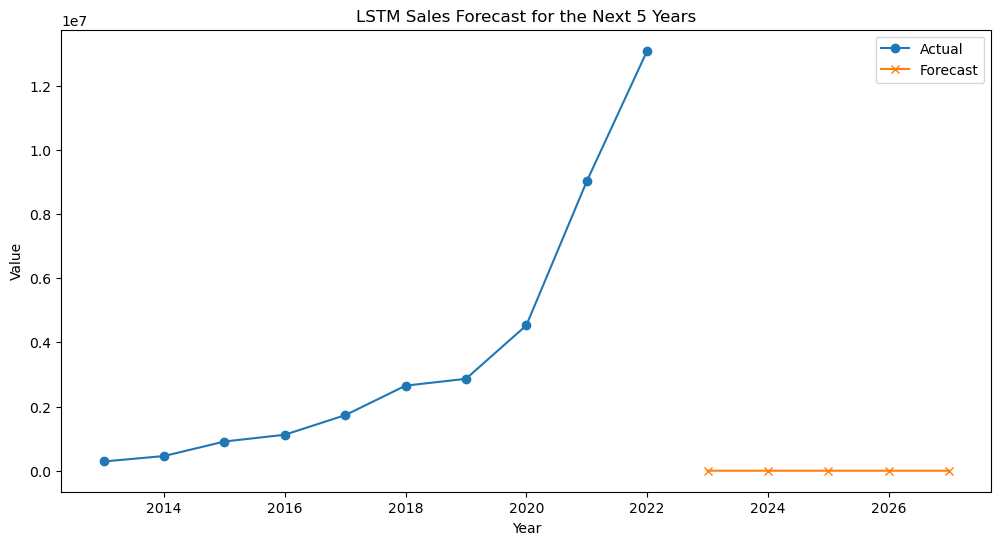

In [14]:
# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='Actual', marker='o')
plt.plot(forecast_df.index, forecast_df['value'], label='Forecast', marker='x')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('LSTM Sales Forecast for the Next 5 Years')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
yhat = model.predict(X, verbose=0)
rmse = np.sqrt(mean_squared_error(y, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5713949.046


In [16]:
from sklearn.metrics import r2_score
r2=r2_score(y,yhat)*100
r2

-100.1801117683761